In [ ]:
import sklearn as skl
import sklearn.preprocessing as skprep
import sklearn.metrics as skmet
import sklearn.linear_model as sklin
import sklearn.model_selection as skms
import sklearn.pipeline as skpipe
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [ ]:
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df['MEDV']=boston_dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


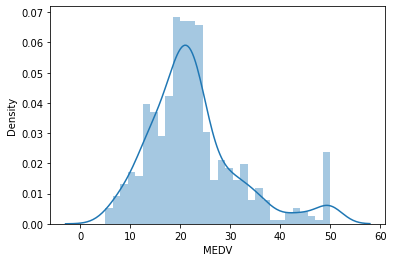

In [ ]:
sns.distplot(df['MEDV'],bins=30)
plt.show()

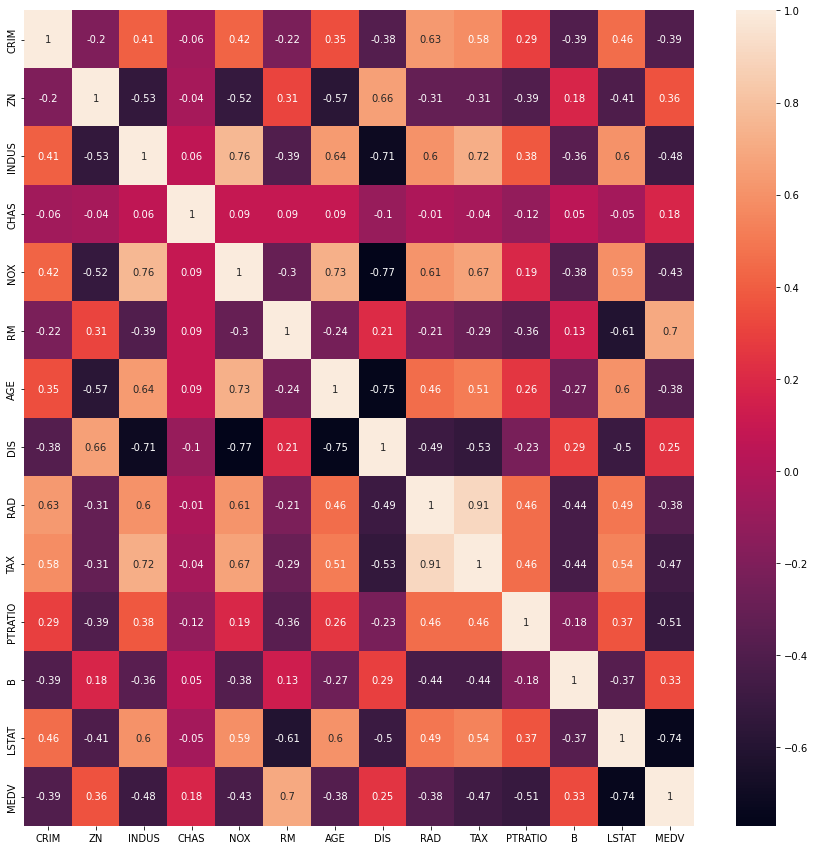

In [ ]:
#Do this to see whether each parameter is directly or inversely proportional to each other
plt.figure(figsize=(15,15))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

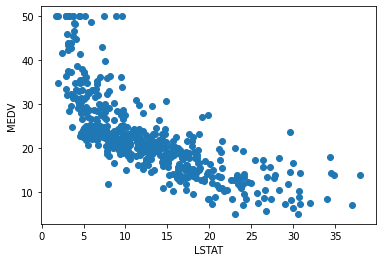

In [ ]:
plt.scatter(x=df['LSTAT'],y=df['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

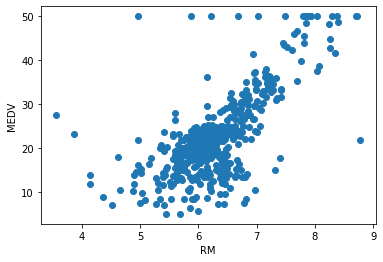

In [ ]:
plt.scatter(x=df['RM'],y=df['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

In [ ]:
x= pd.DataFrame(np.c_[df['LSTAT'],df['RM']],columns=['LSTAT','RM'])
y=df['MEDV']

In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=skms.train_test_split(x,y,test_size=0.2,random_state=5)
pipe1=skpipe.Pipeline([("scale",skprep.StandardScaler()),
                      ("model",sklin.LinearRegression())])

In [ ]:
pipe1.fit(x_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [ ]:
y_predict=pipe1.predict(x_test)

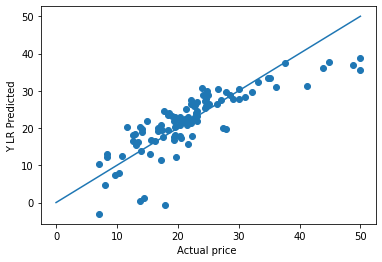

In [ ]:
plt.scatter(x=y_test,y=y_predict)
x_ideal=np.linspace(0,50)
y_ideal=np.linspace(0,50)
plt.plot(x_ideal,y_ideal)
plt.xlabel('Actual price ')
plt.ylabel('Y LR Predicted')
plt.show()

In [ ]:
x_test.head()

,LSTAT,RM
226,3.13,8.040
292,4.70,6.630
90,8.81,6.417
373,34.77,4.906
273,6.58,7.691


In [ ]:
new_vals={'LSTAT':x_test['LSTAT'],'RM':x_test['RM'],'Predicted_price':y_predict}
new_df=pd.DataFrame(data=new_vals).reset_index(drop=True)
new_df.head()

,LSTAT,RM,Predicted_price
0,3.13,8.040,37.389994
1,4.70,6.630,29.792906
2,8.81,6.417,25.867553
3,34.77,4.906,0.313708
4,6.58,7.691,33.313856


In [ ]:
test_data={'LSTAT':x_test['LSTAT'],'RM':x_test['RM'],'Actual_price':y_test}
test_df=pd.DataFrame(data=test_data).reset_index(drop=True)
test_df.head()

,LSTAT,RM,Actual_price
0,3.13,8.040,37.6
1,4.70,6.630,27.9
2,8.81,6.417,22.6
3,34.77,4.906,13.8
4,6.58,7.691,35.2


In [ ]:
# testing out the model with all features for input
train_set2,test_set2=skms.train_test_split(df,test_size=0.2,random_state=5)

In [ ]:
y_train2= train_set2.loc[:,'MEDV']
y_train2=y_train2.reset_index(drop=False)
y_train2=y_train2.drop(columns='index')
y_train2.head()

,MEDV
0,13.1
1,50.0
2,8.8
3,20.6
4,12.1


In [ ]:
y_test2= test_set2.loc[:,'MEDV']
y_test2=y_test2.reset_index(drop=False)
y_test2=y_test2.drop(columns='index')
y_test2.head()

,MEDV
0,37.6
1,27.9
2,22.6
3,13.8
4,35.2


In [ ]:
x_train2=train_set2.drop(columns=['MEDV'])
x_train2=x_train2.reset_index(drop=False)
x_train2=x_train2.drop(columns='index')
x_train2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.15172,0.0,8.14,0.0,0.538,5.701,95.0,3.7872,4.0,307.0,21.0,358.77,18.35
1,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16
2,73.53410,0.0,18.10,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
3,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
4,9.59571,0.0,18.10,0.0,0.693,6.404,100.0,1.6390,24.0,666.0,20.2,376.11,20.31


In [ ]:
x_test2=test_set2.drop(columns=['MEDV'])
x_test2=x_test2.reset_index(drop=False)
x_test2=x_test2.drop(columns='index')
x_test2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13
1,0.03615,80.0,4.95,0.0,0.411,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70
2,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81
3,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77
4,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3.0,223.0,18.6,390.77,6.58


In [ ]:
pipe=skpipe.Pipeline([("scale",skprep.StandardScaler()),
                      ("model",sklin.LinearRegression())])

In [ ]:
pipe.fit(x_train2,y_train2)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

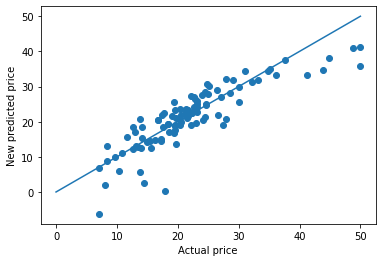

In [ ]:
new_pred2=pipe.predict(x_test2)
plt.scatter(y_test2,new_pred2)
plt.plot(x_ideal,y_ideal)
plt.xlabel("Actual price")
plt.ylabel("New predicted price")
plt.show()

In [ ]:
# with all inputs
lin_mse = skmet.mean_squared_error(y_test2, new_pred2)
lin_rmse = np.sqrt(lin_mse)
print("training error RMSE ",lin_rmse)
lin_mae = skmet.mean_absolute_error(y_test2, new_pred2)
print("training error MAE ",lin_mae)

training error RMSE  4.568292042303209
training error MAE  3.2132704958423837


In [ ]:
#with only lstat and rm
lin_mse = skmet.mean_squared_error(y_test, y_predict)
lin_rmse = np.sqrt(lin_mse)
print("training error RMSE ",lin_rmse)
lin_mae = skmet.mean_absolute_error(y_test, y_predict)
print("training error MAE ",lin_mae)

training error RMSE  5.137400784702911
training error MAE  3.791310213343105


In [ ]:
x_train,x_test,y_train,y_test=skms.train_test_split(x,y,test_size=0.2,random_state=5)
pipe3=skpipe.Pipeline([("scale",skprep.StandardScaler()),
                      ("model",sklin.SGDRegressor())])

In [ ]:
pipe3.fit(x_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('model', SGDRegressor())])

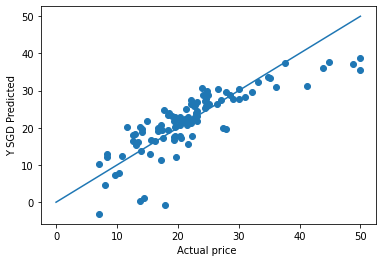

In [ ]:
SGD_prediction=pipe3.predict(x_test)
plt.scatter(x=y_test,y=SGD_prediction)
x_ideal=np.linspace(0,50)
y_ideal=np.linspace(0,50)
plt.plot(x_ideal,y_ideal)
plt.xlabel('Actual price ')
plt.ylabel('Y SGD Predicted')
plt.show()

In [ ]:
#for SGD
lin_mse = skmet.mean_squared_error(y_test, SGD_prediction)
lin_rmse = np.sqrt(lin_mse)
print("training error RMSE ",lin_rmse)
lin_mae = skmet.mean_absolute_error(y_test, SGD_prediction)
print("training error MAE ",lin_mae)

training error RMSE  5.131338101265139
training error MAE  3.7773315591169827
